# Data Science Moringa Group Project - A Data Science Phase 3 Project
# Final Project Submission
#####:

Student name: Pete Njagi,
          

Student pace: DS-full time-Online

Scheduled project review date/time: March 10th 2024

###GitHub Link:
https://github.com/petezdj/Phase3Project

<img src="big%20data-1.jpg" alt="drawing" width="700"/>

#### Important Project Files:

1. index.ipynb (Main Juypter document)
2. Presentation.pdf (Presentation)
3. Data_sci_jobs.csv (Main Data)
4. Optional Project Pdf

## Introduction
KenyaData Insights, 

In [2]:
import pandas as pd

In [3]:
# We must start with loading the datasets
train_values = pd.read_csv('TrainingSetValues.csv')
train_labels = pd.read_csv('TrainingSetLabels.csv')

In [4]:
# Merge the training values and labels for a complete training dataset
train_data = pd.merge(train_values, train_labels, on='id')

The dataset includes 59,400 entries, each with 41 features, including the id and the target variable status_group.

The status_group is the target variable we aim to predict, which describes the functionality of the water points.

Features include a mix of numerical and categorical data, such as amount_tsh (total static head), gps_height, installer, longitude, latitude, population, and several descriptive attributes about the water point like water_quality, quantity, source_type, and waterpoint_type.

In [7]:
# Display the first few rows of the dataset and its summary statistics
train_data.head(), train_data.describe(include='all')

(      id  amount_tsh date_recorded        funder  gps_height     installer  \
 0  69572      6000.0    2011-03-14         Roman        1390         Roman   
 1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
 2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
 3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
 4  19728         0.0    2011-07-13   Action In A           0       Artisan   
 
    longitude   latitude              wpt_name  num_private  ... water_quality  \
 0  34.938093  -9.856322                  none            0  ...          soft   
 1  34.698766  -2.147466              Zahanati            0  ...          soft   
 2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
 3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
 4  31.130847  -1.825359               Shuleni            0  ...          soft   
 
   quality_group      quantity

In [8]:
# Categorical columns with missing values
categorical_cols_missing = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

1. Data Cleaning: Handle the missing values appropriately for each feature.

2. Feature Engineering: Create new features if necessary. For example, the date recorded could be split into year, month, and day to see if there's a seasonal effect on well functionality.

3. Encoding Categorical Variables: Use techniques like one-hot encoding or label encoding to convert categorical variables into a machine-readable format.

4. Feature Selection: Decide which features are relevant to the model. This could be based on domain knowledge, correlation with the target variable, or feature importance from model feedback.

5. Data Splitting: Split your data into training and validation sets to be able to measure the performance of your model on unseen data.

In [9]:
# Fill missing values with the mode
for col in categorical_cols_missing:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)

In [10]:
# Encoding categorical variables using a label encoding strategy
# We will use label encoding instead of one-hot because of the high cardinality of some variables

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()



# List of categorical columns to encode
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('status_group')  # Exclude target variable

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Verify the encoding and missing value treatment
train_data.head(), train_data.isnull().sum()

(      id  amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
 0  69572      6000.0             47    1368        1390       1518  34.938093   
 1   8776         0.0            309     469        1399        545  34.698766   
 2  34310        25.0            300     825         686       2048  37.460664   
 3  67743         0.0            272    1740         263       1852  38.486161   
 4  19728         0.0            104      20           0        119  31.130847   
 
     latitude  wpt_name  num_private  ...  water_quality  quality_group  \
 0  -9.856322     37398            0  ...              6              2   
 1  -2.147466     37194            0  ...              6              2   
 2  -3.821329     14572            0  ...              6              2   
 3 -11.155298     37284            0  ...              6              2   
 4  -1.825359     35528            0  ...              6              2   
 
    quantity  quantity_group  source  source_type  sou

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = train_data.drop(['id', 'status_group'], axis=1) # 'id' is just an identifier and not a feature
y = train_data['status_group']

# Encoding the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Checking the shape of the datasets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 39), (11880, 39), (47520,), (11880,))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model
classification_rep = classification_report(y_val, y_val_pred)

classification_rep


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future ver

'              precision    recall  f1-score   support\n\n           0       0.81      0.90      0.85      6457\n           1       0.56      0.35      0.43       851\n           2       0.85      0.79      0.82      4572\n\n    accuracy                           0.81     11880\n   macro avg       0.74      0.68      0.70     11880\nweighted avg       0.81      0.81      0.81     11880\n'

In [13]:
from sklearn.model_selection import GridSearchCV

# Define a hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, # 3-fold cross-validation
                           n_jobs=-1, # Use all cores
                           scoring='accuracy',
                           verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8067760942760943)

In [14]:
# Retraining the model with the best parameters from grid search
rf_clf_optimized = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=42
)

# Fit the optimized model to the training data
rf_clf_optimized.fit(X_train, y_train)

# Predict on the validation set with the optimized model
y_val_pred_optimized = rf_clf_optimized.predict(X_val)

# Evaluate the optimized model
classification_rep_optimized = classification_report(y_val, y_val_pred_optimized)

classification_rep_optimized

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future ver

'              precision    recall  f1-score   support\n\n           0       0.80      0.92      0.85      6457\n           1       0.62      0.31      0.42       851\n           2       0.87      0.77      0.81      4572\n\n    accuracy                           0.81     11880\n   macro avg       0.76      0.66      0.69     11880\nweighted avg       0.81      0.81      0.81     11880\n'

The optimized Random Forest classifier's performance on the validation set, based on the results as follows:

Overall accuracy: 81%

Class 0 (functional):
Precision: 0.80
Recall: 0.92
F1-score: 0.85

Class 1 (functional needs repair):
Precision: 0.62
Recall: 0.31
F1-score: 0.42

Class 2 (non functional):
Precision: 0.87
Recall: 0.77
F1-score: 0.81

The model has shown an improvement in precision for the class 'functional needs repair' compared to the previous model without hyperparameter tuning. However, the recall is still low for this class, which suggests that the model has difficulties in identifying all the functional but in need of repair pumps.

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


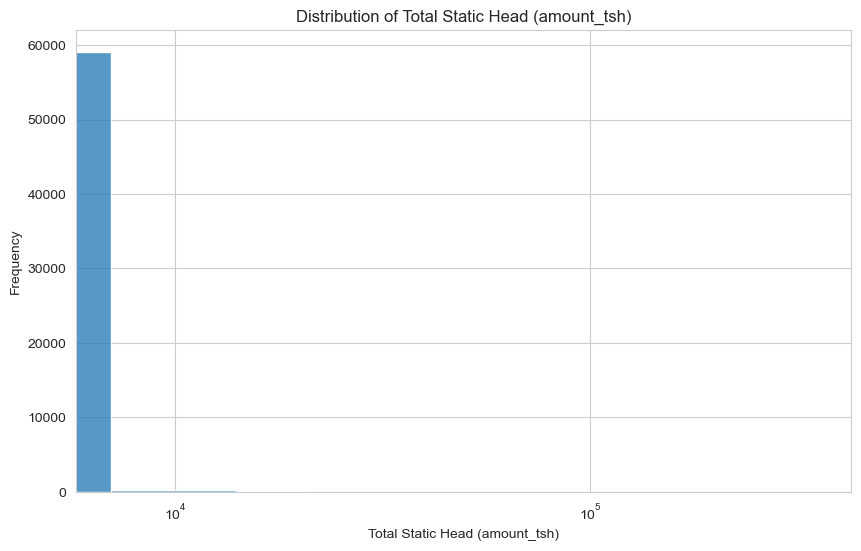

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train_data['amount_tsh'], bins=50, kde=False)
plt.title('Distribution of Total Static Head (amount_tsh)')
plt.xlabel('Total Static Head (amount_tsh)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


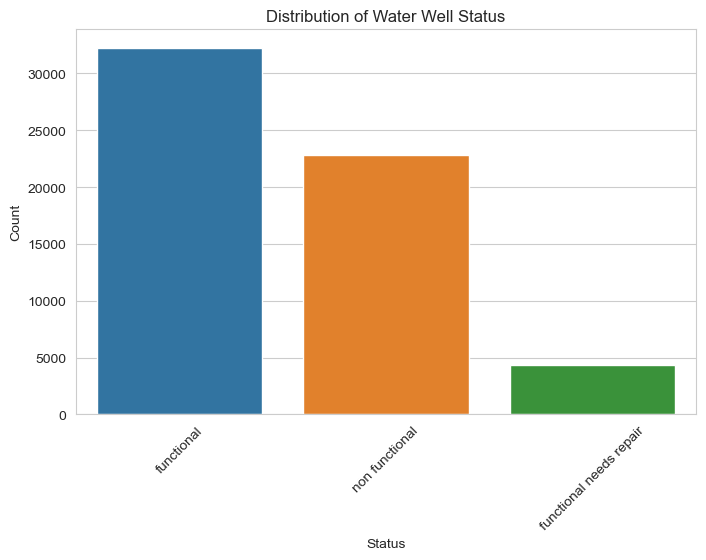

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='status_group', data=train_data)
plt.title('Distribution of Water Well Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
import folium

# Create a base map
m = folium.Map(location=[-6.369028, 34.888822], zoom_start=6) # Centered around Tanzania

# Subset the data to reduce the number of points plotted for quicker rendering
subset_data = train_data.sample(n=1000) 

# Add points to the map
for idx, row in subset_data.iterrows():
    if row['status_group'] == 'functional':
        color = 'green'
    elif row['status_group'] == 'non functional':
        color = 'red'
    else: # functional needs repair
        color = 'blue'

    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.6
                       ).add_to(m)

# Display the map
m


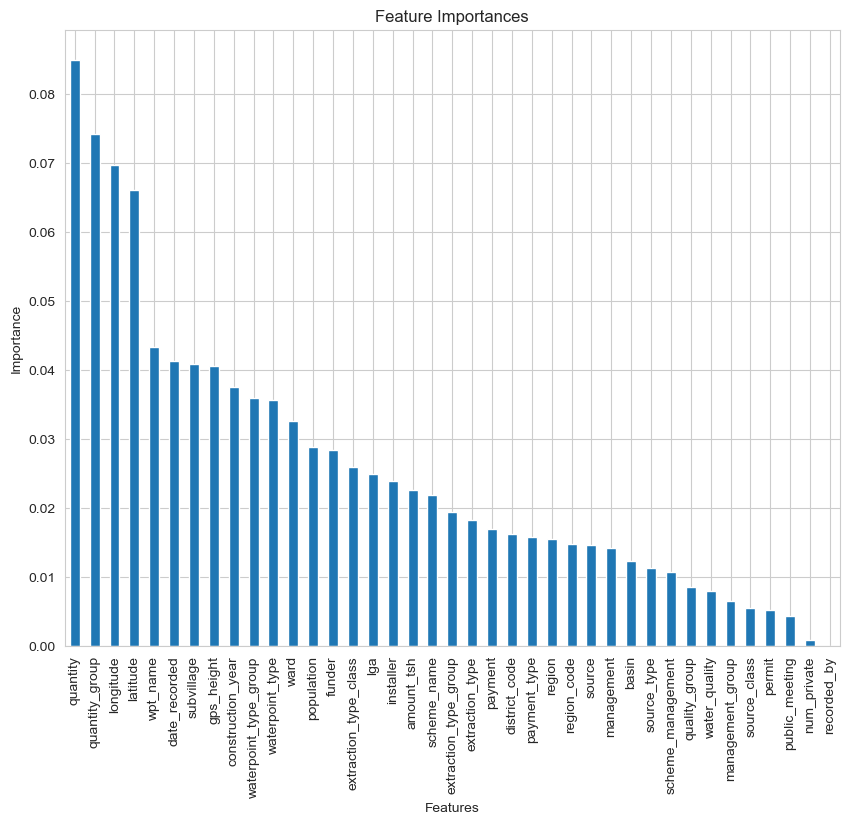

In [20]:
# Get feature importances
importances = rf_clf_optimized.feature_importances_

# Convert the importances into a Series with feature names as the index
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
